# An analysis of Covid-19 pandemic in India




![Covid-19](https://d2v9ipibika81v.cloudfront.net/uploads/sites/71/coronavirus-Information.png)

The data set used here is reagarding the Covid-19 pandemic taken from the source: https://ourworldindata.org/ . This data set can be used to analyse the different waves of Covid-19 pandemic in India.

## Data preparation and cleaning

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Our World in Data - COVID-19 Dataset
Our World in Data (OWID) is a scientific online publication that focuses on large global problems such as poverty, disease, hunger, climate change, war, existential risks, and inequality.

https://ourworldindata.org/
To retrieve the updated dataset from their website we will use the following cell:

In [2]:
url_owid_covid = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

urlretrieve(url_owid_covid, 'owid-covid-data.csv')

('owid-covid-data.csv', <http.client.HTTPMessage at 0x790f02b18460>)

In [3]:
covid_world_df = pd.read_csv('owid-covid-data.csv')
type(covid_world_df)

pandas.core.frame.DataFrame

In [4]:
covid_world_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365508,ZWE,Africa,Zimbabwe,2023-12-15,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365509,ZWE,Africa,Zimbabwe,2023-12-16,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365510,ZWE,Africa,Zimbabwe,2023-12-17,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
365511,ZWE,Africa,Zimbabwe,2023-12-18,265975.0,0.0,0.0,5730.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Just by observing at the printed data frame it is easy to observe the following:

>- The file provides worldwide data from each country
>- The data is categorized by continent and country
>- The data is provided in a daily basis
>- There are several metrics inside the dataset.
>- The dataset contains more than 46 thousand entries

We can see the basic information of the data frame using the .info() method.

In [5]:
covid_world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365513 entries, 0 to 365512
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    365513 non-null  object 
 1   continent                                   348074 non-null  object 
 2   location                                    365513 non-null  object 
 3   date                                        365513 non-null  object 
 4   total_cases                                 327216 non-null  float64
 5   new_cases                                   355673 non-null  float64
 6   new_cases_smoothed                          354414 non-null  float64
 7   total_deaths                                305512 non-null  float64
 8   new_deaths                                  355720 non-null  float64
 9   new_deaths_smoothed                         354490 non-null  float64
 

### Creating Data Frames
Indeed, the data provided by the OWID COVID-19 dataset is very interesting and it would be nice to get in deep to analyze each country and the effects of how this numbers have affected the world, but for the purposes of this work we will focus in India.

To filter the data related to India, we will take advantage that the dataset contains the location column.

Let us filter the data from India, as follows:

In [6]:
covid_world_df[covid_world_df['location'] == 'India']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
146008,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146009,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146010,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146011,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146012,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147450,IND,Asia,India,2023-12-15,45004142.0,312.0,200.143,533310.0,1.0,0.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147451,IND,Asia,India,2023-12-16,45004481.0,339.0,227.429,533311.0,1.0,0.714,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147452,IND,Asia,India,2023-12-17,45004816.0,335.0,251.571,533316.0,5.0,1.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147453,IND,Asia,India,2023-12-18,45004816.0,NaN,NaN,533316.0,0.0,1.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


Notice that compared to the whole covid_world_df, this sample is just from the location or country India.
We will place the data from the country into its own data frame, using the same syntaxis to filter the dataset and assigning it to a new variable.

In [7]:
India_df = covid_world_df[covid_world_df['location'] == 'India']
India_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
146008,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146009,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146010,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146011,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
146012,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147450,IND,Asia,India,2023-12-15,45004142.0,312.0,200.143,533310.0,1.0,0.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147451,IND,Asia,India,2023-12-16,45004481.0,339.0,227.429,533311.0,1.0,0.714,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147452,IND,Asia,India,2023-12-17,45004816.0,335.0,251.571,533316.0,5.0,1.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
147453,IND,Asia,India,2023-12-18,45004816.0,NaN,NaN,533316.0,0.0,1.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


Now, let us create new .CSV file based on the recently crated data frame country to store the original data. To do so, you can use the method to_cvs(), from Pandas, which creates a CVS file from a data frame.

Notice that the second argument of the method is index=False, this is to avoid passing the high numbers from the original dataset.

In [8]:

India_df.to_csv('canada_covid_data.csv', index=False)

In [9]:

India_df = pd.read_csv('canada_covid_data.csv')
India_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
2,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
3,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
4,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,IND,Asia,India,2023-12-15,45004142.0,312.0,200.143,533310.0,1.0,0.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1443,IND,Asia,India,2023-12-16,45004481.0,339.0,227.429,533311.0,1.0,0.714,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1444,IND,Asia,India,2023-12-17,45004816.0,335.0,251.571,533316.0,5.0,1.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1445,IND,Asia,India,2023-12-18,45004816.0,NaN,NaN,533316.0,0.0,1.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


Let us verify that each of the data frames were imported correctly by printing the first and last 5 rows.

To print the first 5 rows of a data frame, we can use the .head() method, for example:

In [10]:
India_df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
2,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
3,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
4,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
5,IND,Asia,India,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
6,IND,Asia,India,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
7,IND,Asia,India,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
8,IND,Asia,India,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
9,IND,Asia,India,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [11]:
India_df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1437,IND,Asia,India,2023-12-10,45003055.0,166.0,125.143,533306.0,0.0,0.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1438,IND,Asia,India,2023-12-11,45003177.0,122.0,134.143,533307.0,1.0,1.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1439,IND,Asia,India,2023-12-12,45003341.0,164.0,145.714,533307.0,0.0,0.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1440,IND,Asia,India,2023-12-13,45003593.0,252.0,164.714,533308.0,1.0,0.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1441,IND,Asia,India,2023-12-14,45003830.0,237.0,181.286,533309.0,1.0,0.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1442,IND,Asia,India,2023-12-15,45004142.0,312.0,200.143,533310.0,1.0,0.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1443,IND,Asia,India,2023-12-16,45004481.0,339.0,227.429,533311.0,1.0,0.714,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1444,IND,Asia,India,2023-12-17,45004816.0,335.0,251.571,533316.0,5.0,1.429,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1445,IND,Asia,India,2023-12-18,45004816.0,NaN,NaN,533316.0,0.0,1.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
1446,IND,Asia,India,2023-12-19,45004816.0,NaN,NaN,533316.0,0.0,1.286,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


Now that we verified that the data was imported correctly, we can start checking the information inside.

Since these data frames include a lot of data and it is hard to read it all at once, we will create new data frames with certain columns only.

To list all the columns included in the data frames we can use the .columns() method:

In [12]:
India_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

From the information displayed above we will take the following columns:

- date
- new_cases
- new_deaths
- new_tests
- total_cases
- total_deaths
- total_tests

In [13]:
covid_India_df = India_df[['date', 'new_cases', 'new_deaths', 'new_tests', 'total_cases', 'total_deaths', 'total_tests']]

We know that the date is in a YEAR-MONTH-DAY format, but it would be good to have it in separate columns for an easier access to the information.

For that we can this with .DatetimeIndex(), which splits the date in the desire format as follows:

In [14]:

covid_India_df['month'] = pd.DatetimeIndex(covid_India_df.date).month
covid_India_df['day'] = pd.DatetimeIndex(covid_India_df.date).day
covid_India_df['year'] = pd.DatetimeIndex(covid_India_df.date).year
covid_India_df

/tmp/ipykernel_20/881624076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_India_df['month'] = pd.DatetimeIndex(covid_India_df.date).month
/tmp/ipykernel_20/881624076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_India_df['day'] = pd.DatetimeIndex(covid_India_df.date).day
/tmp/ipykernel_20/881624076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
0,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,1,3,2020
1,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,1,4,2020
2,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,1,5,2020
3,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,1,6,2020
4,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,1,7,2020
...,...,...,...,...,...,...,...,...,...,...
1442,2023-12-15,312.0,1.0,NaN,45004142.0,533310.0,NaN,12,15,2023
1443,2023-12-16,339.0,1.0,NaN,45004481.0,533311.0,NaN,12,16,2023
1444,2023-12-17,335.0,5.0,NaN,45004816.0,533316.0,NaN,12,17,2023
1445,2023-12-18,NaN,0.0,NaN,45004816.0,533316.0,NaN,12,18,2023


Now that we have the datasets separately we can perform a quick statistical by using the .describe() method which returns information such as mean, standard deviation, minimum/maximum values and number of non-empty values.

In [15]:
covid_India_df.describe()

,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
count,1442.000000,1447.00000,7.950000e+02,1.420000e+03,1377.000000,8.100000e+02,1447.000000,1447.000000,1447.000000
mean,31210.520111,368.56669,1.055093e+06,2.950585e+07,374750.507625,3.660221e+08,6.485142,15.668279,2021.488597
std,65607.271085,747.65665,1.379855e+06,1.748358e+07,197864.555184,2.932974e+08,3.424086,8.778935,1.114336
min,0.000000,0.00000,1.570000e+02,1.000000e+00,1.000000,6.500000e+03,1.000000,1.000000,2020.000000
25%,230.250000,2.00000,4.985255e+05,1.057932e+07,156212.000000,8.923136e+07,4.000000,8.000000,2020.000000
50%,7480.500000,53.00000,1.014079e+06,3.544819e+07,494091.000000,2.976885e+08,7.000000,16.000000,2021.000000
75%,31075.500000,434.50000,1.411204e+06,4.467798e+07,530721.000000,6.379624e+08,9.000000,23.000000,2022.000000
max,414188.000000,6148.00000,3.585563e+07,4.500482e+07,533316.000000,8.585264e+08,12.000000,31.000000,2023.000000


## Exploratory Analysis

**Lets look at the days with over 3000 reported deaths**

This will give us a basic idea on the time period where the most damage occured.

In [16]:
high_deaths_days_df = covid_India_df[covid_India_df.new_deaths > 3000]
high_deaths_days_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year
481,2021-04-28,360960.0,3293.0,1723912.0,17997267.0,201187.0,282703789.0,4,28,2021
482,2021-04-29,379257.0,3645.0,1768190.0,18376524.0,204832.0,284471979.0,4,29,2021
483,2021-04-30,386452.0,3498.0,1920107.0,18762976.0,208330.0,286392086.0,4,30,2021
484,2021-05-01,401993.0,3523.0,1945299.0,19164969.0,211853.0,288337385.0,5,1,2021
485,2021-05-02,392488.0,3689.0,1804954.0,19557457.0,215542.0,290142339.0,5,2,2021
486,2021-05-03,368147.0,3417.0,1504698.0,19925604.0,218959.0,291647037.0,5,3,2021
487,2021-05-04,357229.0,3449.0,1663742.0,20282833.0,222408.0,293310779.0,5,4,2021
488,2021-05-05,382315.0,3780.0,1541299.0,20665148.0,226188.0,294852078.0,5,5,2021
489,2021-05-06,412262.0,3980.0,1923131.0,21077410.0,230168.0,296775209.0,5,6,2021
490,2021-05-07,414188.0,3915.0,1826490.0,21491598.0,234083.0,298601699.0,5,7,2021


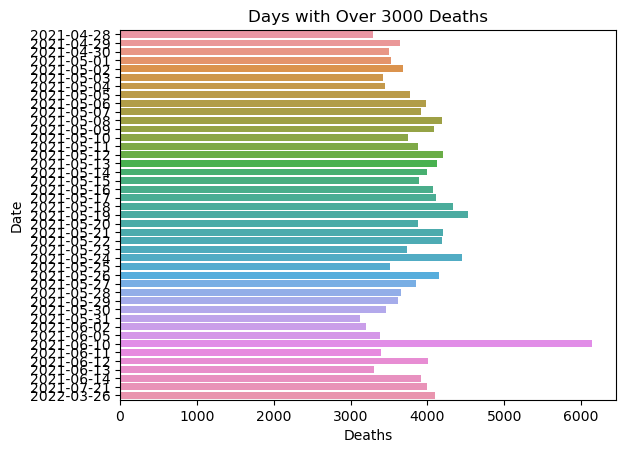

In [17]:
sns.barplot(x=high_deaths_days_df.new_deaths, y=high_deaths_days_df.date)
plt.title('Days with Over 3000 Deaths')
plt.xlabel('Deaths'); plt.ylabel('Date');

The Highest cases of deaths are recorded during the span of May and June months of 2021. With the highest recording ever been on  10-06-2021 with 6148 deaths.

**Lets now analyse the positive cases in India according to the month**

 To do this, it will be necessary to group the information by months instead that per days. To do so, we will use the .groupby() method from Pandas.

In [18]:
covid_India_month_df = covid_India_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_India_month_df.sum()

new_cases      45005570.0
new_deaths       533316.0
new_tests     838798638.0
dtype: float64

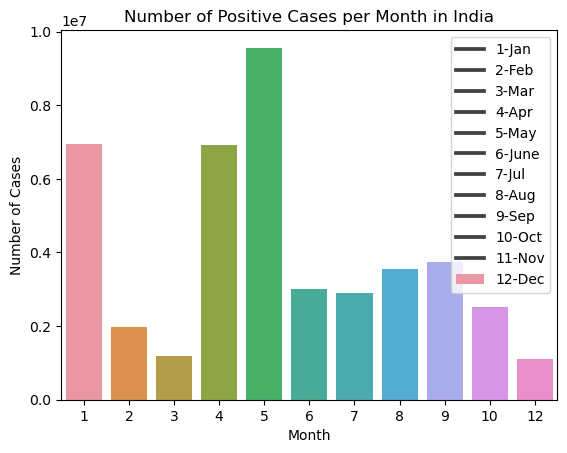

In [19]:
sns.barplot(x=covid_India_month_df.index.drop(11),y=covid_India_month_df.new_cases.drop(index=11))
plt.title('Number of Positive Cases per Month in India')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep','10-Oct','11-Nov', '12-Dec'])
plt.xlabel('Month'); plt.ylabel('Number of Cases');

With this is easy to observe that May was the month with the most positive cases so far, followed by April and January.

**the months with the most number of deaths**

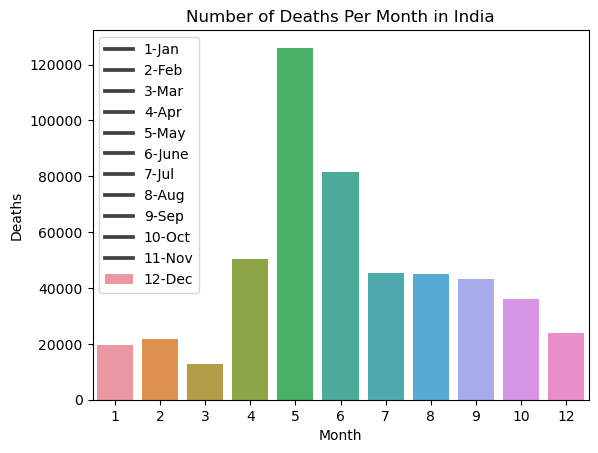

In [20]:
sns.barplot(x=covid_India_month_df.index.drop(11),y=covid_India_month_df.new_deaths.drop(index=11))
plt.title('Number of Deaths Per Month in India')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep','10-Oct', '11-Nov', '12-Dec'])
plt.xlabel('Month'); plt.ylabel('Deaths');

Clearly most deaths has occured in the month of May followed by june.


**Lets look at the number of tests that have been performed on monthly basis**

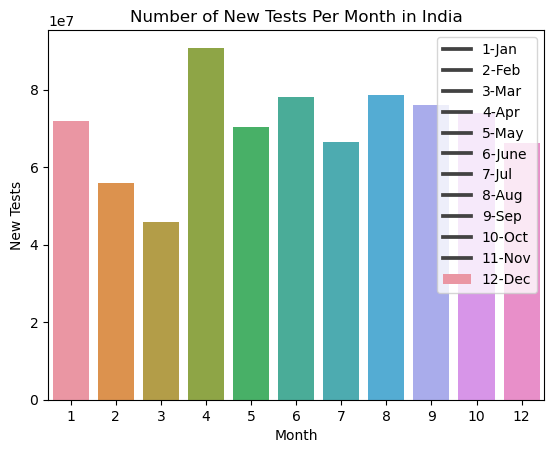

In [21]:
sns.barplot(x=covid_India_month_df.index.drop(11), y=covid_India_month_df.new_tests.drop(index=11))
plt.title('Number of New Tests Per Month in India')
plt.legend(['1-Jan', '2-Feb', '3-Mar', '4-Apr', '5-May', '6-June', '7-Jul', '8-Aug', '9-Sep','10-Oct','11-Nov','12-Dec' ])
plt.xlabel('Month'); plt.ylabel('New Tests');

Most cases were performed during the months of April , June and August. This makes sense because the Lockdown in 2020 and the subsequent covid wave in 2021 has occured during the months of march and april and may.


**Lets compute the test positive rate and death rate per month**

For that we will have to create 2 new columns in the monthly data frame which will be called death_rate and test_positive_rate.

In [22]:
covid_India_month_df['death_rate']= covid_India_month_df.new_deaths /covid_India_month_df.new_tests
covid_India_month_df['test_positive_rate']= covid_India_month_df.new_cases /covid_India_month_df.new_tests
covid_India_month_df

,new_cases,new_deaths,new_tests,death_rate,test_positive_rate
month,,,,,
1,6947550.0,19544.0,71833952.0,0.000272,0.096717
2,1975830.0,21601.0,55960118.0,0.000386,0.035308
3,1183575.0,12831.0,45836883.0,0.000280,0.025821
4,6926467.0,50244.0,90775423.0,0.000553,0.076303
5,9561073.0,126024.0,70272029.0,0.001793,0.136058
6,2997688.0,81604.0,78189850.0,0.001044,0.038339
7,2892263.0,45463.0,66551310.0,0.000683,0.043459
8,3547382.0,45002.0,78589004.0,0.000573,0.045138
9,3736147.0,43386.0,75953381.0,0.000571,0.049190


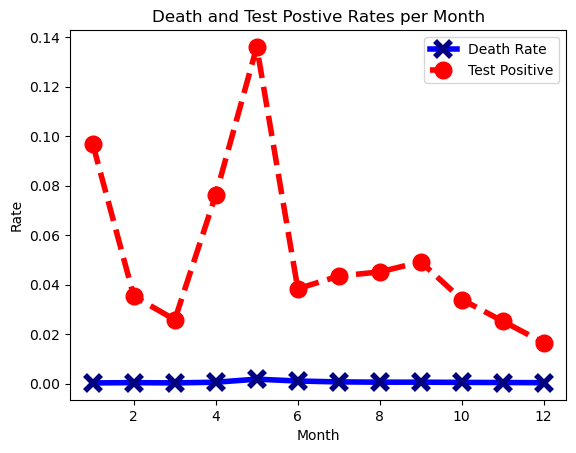

In [23]:
plt.plot(covid_India_month_df.index, covid_India_month_df.death_rate, 'b-x', linewidth=4, markersize=12, markeredgewidth=4, markeredgecolor='navy')
plt.plot(covid_India_month_df.index, covid_India_month_df.test_positive_rate, 'r--o', linewidth=4, markersize=12,)
plt.title('Death and Test Postive Rates per Month')
plt.legend(['Death Rate', 'Test Positive'])
plt.xlabel('Month'); plt.ylabel('Rate');

**percentage of the population that have tested positive in the country**

To answer this question let us include the population of the country in the covid_canada_df data frame. Also, we will create a pie chart to see the whole picture.

In [24]:
covid_India_df['population'] = India_df.population
covid_India_df

/tmp/ipykernel_20/2035437241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_India_df['population'] = India_df.population


,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year,population
0,2020-01-03,0.0,0.0,NaN,NaN,NaN,NaN,1,3,2020,1.417173e+09
1,2020-01-04,0.0,0.0,NaN,NaN,NaN,NaN,1,4,2020,1.417173e+09
2,2020-01-05,0.0,0.0,NaN,NaN,NaN,NaN,1,5,2020,1.417173e+09
3,2020-01-06,0.0,0.0,NaN,NaN,NaN,NaN,1,6,2020,1.417173e+09
4,2020-01-07,0.0,0.0,NaN,NaN,NaN,NaN,1,7,2020,1.417173e+09
...,...,...,...,...,...,...,...,...,...,...,...
1442,2023-12-15,312.0,1.0,NaN,45004142.0,533310.0,NaN,12,15,2023,1.417173e+09
1443,2023-12-16,339.0,1.0,NaN,45004481.0,533311.0,NaN,12,16,2023,1.417173e+09
1444,2023-12-17,335.0,5.0,NaN,45004816.0,533316.0,NaN,12,17,2023,1.417173e+09
1445,2023-12-18,NaN,0.0,NaN,45004816.0,533316.0,NaN,12,18,2023,1.417173e+09


Now we extract the information:

In [25]:
population = covid_India_df.population[0]
total_cases = covid_India_df.total_cases[covid_India_df.total_cases.last_valid_index()]
total_deaths = covid_India_df.total_deaths[covid_India_df.total_deaths.last_valid_index()]
total_tests = covid_India_df.total_tests[covid_India_df.total_tests.last_valid_index()]
total_non_tested = population - total_tests

And finally, it is just a matter to plot the information as follows:

Text(0.5, 1.0, 'Population India per Tests, Cases, Deaths')

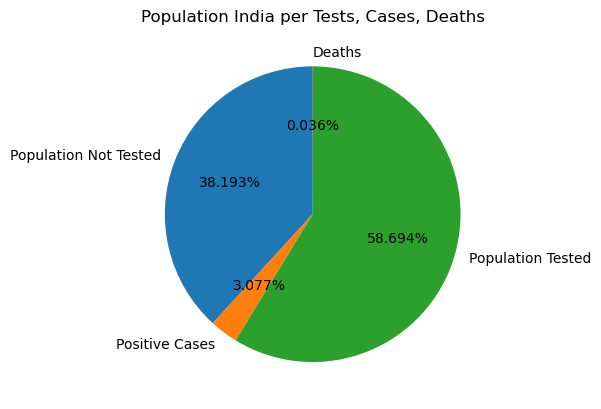

In [26]:
plt.pie([total_non_tested, total_cases,  total_tests, total_deaths], 
        labels=['Population Not Tested', 'Positive Cases', 'Population Tested', 'Deaths'], 
        autopct='%1.3f%%', startangle=90, counterclock=True, data=True, )
plt.title('Population India per Tests, Cases, Deaths')

It turns out that more than half of the population of India has been tested for COVID-19 where:

- ~5.695% of the population has been tested
- ~3.076% of the population has been tested positive
- ~0.036% of the population has died
- ~38.20% of the population has not been tested

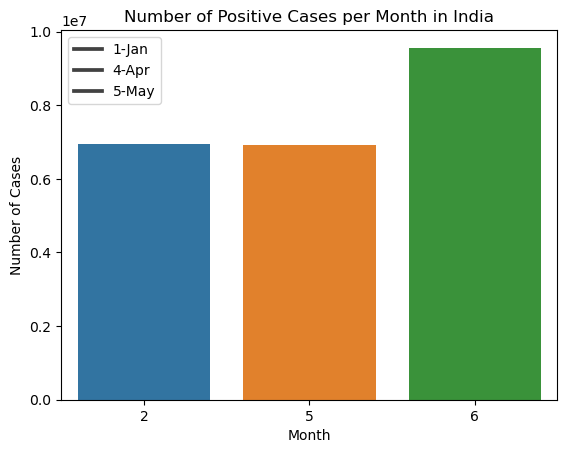

In [27]:
sns.barplot(x=[covid_India_month_df.index[1], covid_India_month_df.index[4], covid_India_month_df.index[5]], 
            y= [covid_India_month_df.new_cases[1], covid_India_month_df.new_cases[4], covid_India_month_df.new_cases[5]])
plt.title('Number of Positive Cases per Month in India')
plt.legend(['1-Jan', '4-Apr', '5-May'])
plt.xlabel('Month') 
plt.ylabel('Number of Cases');

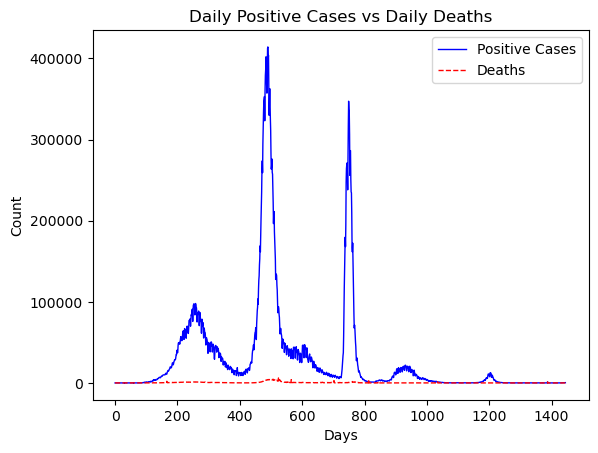

In [28]:
plt.plot(covid_India_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_India_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positive Cases vs Daily Deaths')
plt.legend(['Positive Cases', 'Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

## Questions and Answers.

Inorder to understand better the information in this dataset, it would be a good idea to set it as a matter of questions and answers:

Let us start by setting up some parameters for the plots that we are going to create.

In [29]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Q1: When was the first confirmed case reported in India?**

To answer this question we can use the .neor Not Equal to a certain value, in this case 0, and it can be applied to the new_cases series

In [30]:
first_confirmed_case = covid_India_df.date.loc[covid_India_df['new_cases'].ne(0).idxmax()]
print("The first confirmed case in India was reported on {}.".format(str(first_confirmed_case)))

The first confirmed case in India was reported on 2020-01-30.


**Q2: When was the first death related to COVID-19 reported?**

In [31]:
first_death = covid_India_df.date.loc[covid_India_df['new_deaths'].ne(0).idxmax()]
print("The first death related to COVID-19 in India was reported on {}.".format(str(first_death)))

The first death related to COVID-19 in India was reported on 2020-03-13.


**Q3: How did the number of daily new cases and new deaths evolved in India?**

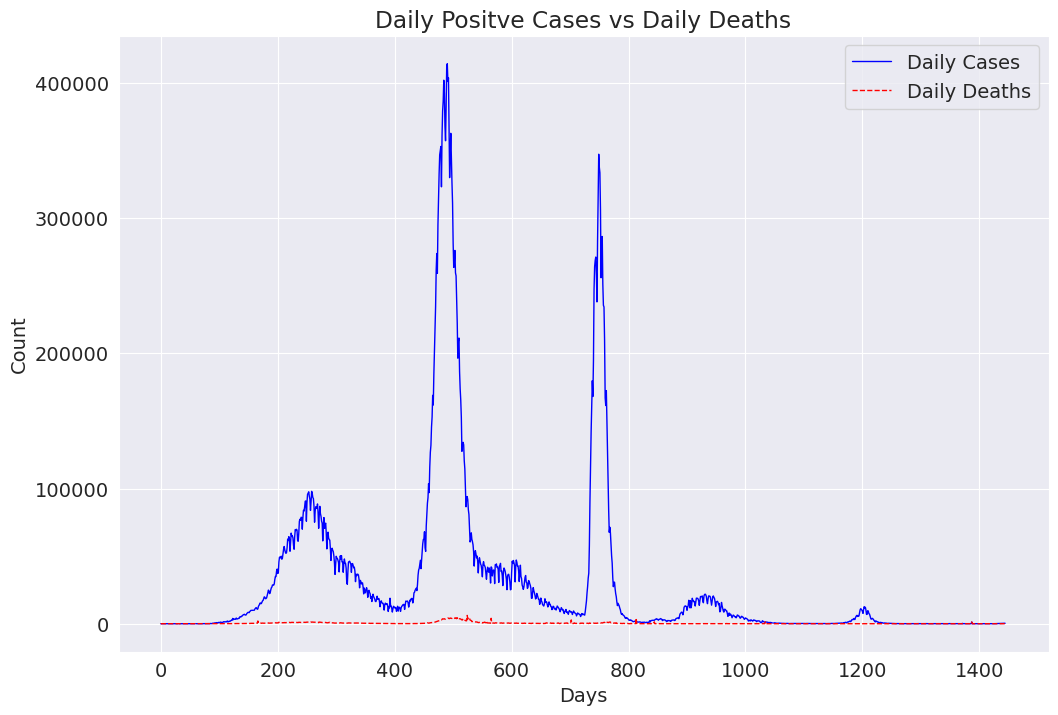

In [32]:
plt.plot(covid_India_df.new_cases, 'b-', linewidth=1, markersize=5, markeredgewidth=2, markeredgecolor='navy')
plt.plot(covid_India_df.new_deaths, 'r--', linewidth=1, markersize=5,)
plt.title('Daily Positve Cases vs Daily Deaths')
plt.legend(['Daily Cases', 'Daily Deaths'])
plt.xlabel('Days'); plt.ylabel('Count');

It seems that during the lockdown (around day 200-400) the new deaths reported were considerably low, compared to the number of cases. But there were two more of big waves during the april -may months of 2021 and january month of 2022.

**Q4: Which days were the ones that reported the highest number of cases?**

To answer this we need to consider the average of daily cases.

In [33]:
covid_India_df.new_cases.describe()

count      1442.000000
mean      31210.520111
std       65607.271085
min           0.000000
25%         230.250000
50%        7480.500000
75%       31075.500000
max      414188.000000
Name: new_cases, dtype: float64

Lets consider 300000 as the threshold.

In [34]:
high_positive_cases_df = covid_India_df[covid_India_df.new_cases > 300000]
high_positive_cases_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year,population
475,2021-04-22,314835.0,2104.0,1651711.0,15930965.0,184657.0,272705103.0,4,22,2021,1.417173e+09
476,2021-04-23,332730.0,2263.0,1740550.0,16263695.0,186920.0,274445653.0,4,23,2021,1.417173e+09
477,2021-04-24,346786.0,2624.0,1753569.0,16610481.0,189544.0,276199222.0,4,24,2021,1.417173e+09
478,2021-04-25,349691.0,2767.0,1719588.0,16960172.0,192311.0,277918810.0,4,25,2021,1.417173e+09
479,2021-04-26,352991.0,2812.0,1402367.0,17313163.0,195123.0,279321177.0,4,26,2021,1.417173e+09
480,2021-04-27,323144.0,2771.0,1658700.0,17636307.0,197894.0,280979877.0,4,27,2021,1.417173e+09
481,2021-04-28,360960.0,3293.0,1723912.0,17997267.0,201187.0,282703789.0,4,28,2021,1.417173e+09
482,2021-04-29,379257.0,3645.0,1768190.0,18376524.0,204832.0,284471979.0,4,29,2021,1.417173e+09
483,2021-04-30,386452.0,3498.0,1920107.0,18762976.0,208330.0,286392086.0,4,30,2021,1.417173e+09
484,2021-05-01,401993.0,3523.0,1945299.0,19164969.0,211853.0,288337385.0,5,1,2021,1.417173e+09


In [35]:
high_positive_cases_df.shape

(30, 11)

As result, we have that there are around 30 days with over 300000 new confirmed cases. Now let us sort these information based on the highest confirmed cases date.

In [36]:
high_positive_cases_df.sort_values('new_cases', ascending=False)

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,month,day,year,population
490,2021-05-07,414188.0,3915.0,1826490.0,21491598.0,234083.0,298601699.0,5,7,2021,1.417173e+09
489,2021-05-06,412262.0,3980.0,1923131.0,21077410.0,230168.0,296775209.0,5,6,2021,1.417173e+09
492,2021-05-09,403738.0,4092.0,1865428.0,22296414.0,242362.0,302275471.0,5,9,2021,1.417173e+09
484,2021-05-01,401993.0,3523.0,1945299.0,19164969.0,211853.0,288337385.0,5,1,2021,1.417173e+09
491,2021-05-08,401078.0,4187.0,1808344.0,21892676.0,238270.0,300410043.0,5,8,2021,1.417173e+09
485,2021-05-02,392488.0,3689.0,1804954.0,19557457.0,215542.0,290142339.0,5,2,2021,1.417173e+09
483,2021-04-30,386452.0,3498.0,1920107.0,18762976.0,208330.0,286392086.0,4,30,2021,1.417173e+09
488,2021-05-05,382315.0,3780.0,1541299.0,20665148.0,226188.0,294852078.0,5,5,2021,1.417173e+09
482,2021-04-29,379257.0,3645.0,1768190.0,18376524.0,204832.0,284471979.0,4,29,2021,1.417173e+09
486,2021-05-03,368147.0,3417.0,1504698.0,19925604.0,218959.0,291647037.0,5,3,2021,1.417173e+09


And now let us plot this information:

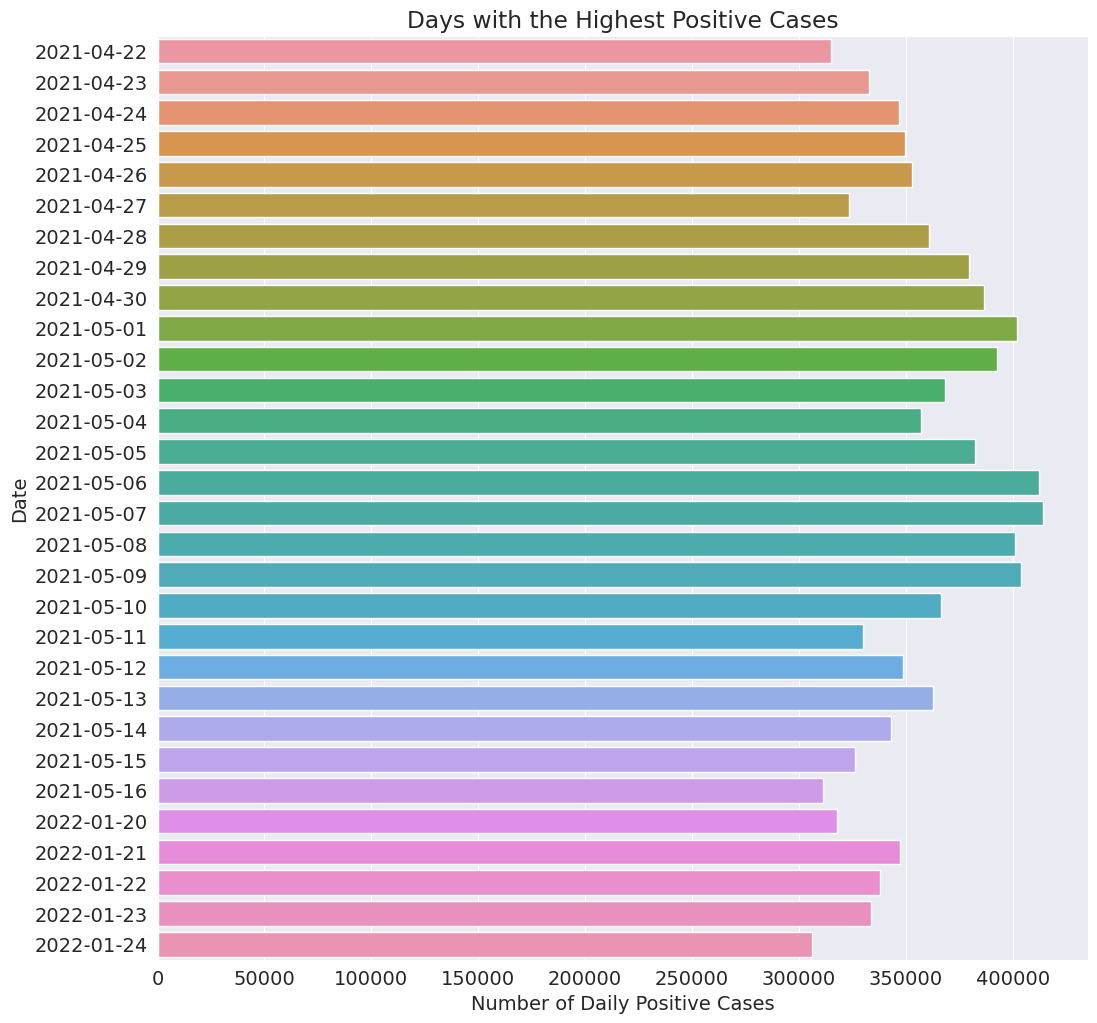

In [37]:
plt.figure(figsize=(12,12))
sns.barplot(x=high_positive_cases_df.new_cases,y= high_positive_cases_df.date)
plt.title('Days with the Highest Positive Cases')
plt.xlabel('Number of Daily Positive Cases'); plt.ylabel('Date');

## Saving the Dataframes as CSV Files

Finally, we can save the data frames as CSV files for further reference, as follows:

In [38]:
covid_India_df.to_csv('India_covid_slim_data.csv', index=False)
covid_India_month_df.to_csv('India_covid_monthly_data.csv', index=False)

## Inferences and Conlusions

In this notebook an analysis about how the COVID-19 pandemic has impacted Canada was presented, where the findings about the data are listed as follows:

- May(9561073.0), January(6947550.0) and April(6926467.0) are the months with most recorded cases of covid in India.
- The first confirmed case in India was reported on 2020-01-30.
- The first death related to COVID-19 in India was reported on 2020-03-13 .
- 10th of June was the day with most number of deaths in the country at 6148 deaths reported across the country.
- ~3.076% of the population has been tested positive for the covid-19 tests.
- The highest positive test result rate was during the month of may with no less than 0.13% of the tests conducted resulted in positive.
- The total number of cases registeres during the course of the pandemic is 44994851.
- The first confirmed case in India was reported on 2020-01-30.
- The first death related to COVID-19 in India was reported on 2020-03-13 .
-  May was the month with highest number of deaths 126024.


## References and future projects

There is a wealth of information to be discovered using the COVID-19 dataset, and we have barely scratched the surface. Here are some ideas for further exploration:

1. Repeat the analysis for different country and compare the results with the ones from India
2. Prepare an analysis based on world region or countries, e.g. UK, USA, Italy.
3. Compare how the data from different countries reflects how the local governments have responded to the pandemic

**References:**

- Our World in Data - COVID-19 Dataset: https://ourworldindata.org/coronavirus
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html